In [150]:
import pandas as pd
import toad.transform


def fe_application(df):
    #上班天数比例
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    # 收入和授信比例
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    # 家庭人均收入   收入/家庭人口
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    # 年金/收入 比例
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    # 年金/授信比例
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    ft_list = ['income_per_person', 'DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 'INCOME_PER_PERSON',
               'ANNUITY_INCOME_PERC', 'PAYMENT_RATE']
    return df, ft_list

In [151]:
import pandas as pd
application_train_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\application_train_cleaned.csv')
application_train_ft, new_application_fts = fe_application(application_train_ft)
df_ft = application_train_ft

In [3]:
bureau_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\bureau_balance.csv')
bureau_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\bureau_cleaned.csv')
pos_cash_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\pos_cash_balance_cleaned.csv')
credit_card_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\credit_card_balance_cleaned.csv')
previous_application_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\previous_application_cleaned.csv')
installment_payments_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\installment_payments_cleaned.csv')

In [130]:
def fe_previous_application_ft(df_a):
    df_b = pd.DataFrame()
    lists =['Unused offer','Canceled']
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']

    #历史申请次数
    df_b['Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])
    #申请记录的第一次付款时间相隔天数最多
    df_b['DAYS_FIRST_DRAWING_MAX'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DRAWING'].max()
    #申请记录的第一次付款时间相隔天数平均
    df_b['DAYS_FIRST_DRAWING_AVG'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DRAWING'].mean()
    #申请记录的第一次付款时间相隔天数最小
    df_b['DAYS_FIRST_DRAWING_MIN'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DRAWING'].min()
    #申请记录的第一次付款时间相隔天数总数
    df_b['DAYS_FIRST_DRAWING_SUM'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DRAWING'].sum()    
    
    #申请记录的首次到期时间相隔天数最多
    df_b['DAYS_FIRST_DUE_MAX'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].max()
    #平均
    df_b['DAYS_FIRST_DUE_AVG'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].mean()
    #最小
    df_b['DAYS_FIRST_DUE_MIN'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].min()
    #总数
    df_b['DAYS_FIRST_DUE_SUM'] =df.groupby('SK_ID_CURR')['DAYS_FIRST_DUE'].sum()
    
    #申请记录的首次逾期时间相隔天数最多
    df_b['DAYS_LAST_DUE_1ST_VERSION_MAX'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE_1ST_VERSION'].max()
    #平均
    df_b['DAYS_LAST_DUE_1ST_VERSION_AVG'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE_1ST_VERSION'].mean()
    #最小
    df_b['DAYS_LAST_DUE_1ST_VERSION_MIN'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE_1ST_VERSION'].min()
    #总数
    df_b['DAYS_LAST_DUE_1ST_VERSION_SUM'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE_1ST_VERSION'].sum()
    
    #申请记录的最后一次到期时间相隔天数最多
    df_b['DAYS_LAST_DUE_MAX'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].max()
    #平均
    df_b['DAYS_LAST_DUE_AVG'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].mean()
    #最小
    df_b['DAYS_LAST_DUE_MIN'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].min()
    #总数
    df_b['DAYS_LAST_DUE_SUM'] =df.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].sum()
    
    #预期终止时间相隔天数最多
    df_b['DAYS_TERMINATION_MAX'] =df.groupby('SK_ID_CURR')['DAYS_TERMINATION'].max()
    #平均
    df_b['DAYS_TERMINATION_AVG'] =df.groupby('SK_ID_CURR')['DAYS_TERMINATION'].mean()
    #最小
    df_b['DAYS_TERMINATION_MIN'] =df.groupby('SK_ID_CURR')['DAYS_TERMINATION'].min()
    #总数
    df_b['DAYS_TERMINATION_SUM'] =df.groupby('SK_ID_CURR')['DAYS_TERMINATION'].sum()
    
     #历史被拒次数
    df_b['Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()   
    #平均每次通过额度
    df_b['P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']
    
    #历史通过率
    df_b['Pass_rate'] = (df_b['Number_of_Refused']+df_b['Number_of_Approved'])/df_b['Number_of_Approved']
    
    #距今90天内 DAYS_DECISION 距今时间
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df = df[df['DAYS_DECISION']>=-90]

    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_p = df_p[df_p['DAYS_DECISION']>=-90]
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']
    df_r = df_r[df_r['DAYS_DECISION']>=-90]
    
    #历史被拒次数
    df_b['90D_Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['90D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['90D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['90D_R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['90D_Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['90D_P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['90D_P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次通过额度
    df_b['90D_P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['90D_P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['90D_P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['90D_P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['90D_Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['90D_Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']

    #历史申请次数
    df_b['90D_Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['90D_Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['90D_Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['90D_avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['90D_avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['90D_NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['90D_CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['90D_NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['90D_CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['90D_CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['90D_CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['90D_CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['90D_NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])


    #距今280天内
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df = df[df['DAYS_DECISION']>=-280]
    
    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_p = df_p[df_p['DAYS_DECISION']>=-280]
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']
    df_r = df_r[df_r['DAYS_DECISION']>=-280]
    
    #历史被拒次数
    df_b['280D_Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['280D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['280D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['280D_R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['280D_Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['280D_P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['280D_P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次通过额度
    df_b['280D_P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['280D_P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['280D_P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['280D_P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['280D_Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['280D_Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']

    #历史申请次数
    df_b['280D_Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['280D_Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['280D_Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['280D_avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['280D_avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['280D_NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['280D_CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['280D_NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['280D_CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['280D_CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['280D_CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['280D_CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['280D_NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])
    
    #距今581天内
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df = df[df['DAYS_DECISION']>=-581]

    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_p = df_p[df_p['DAYS_DECISION']>=-581]
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']
    df_r = df_r[df_r['DAYS_DECISION']>=-581]
    
    #历史被拒次数
    df_b['581D_Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['581D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['581D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['581D_R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['581D_Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['581D_P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['581D_P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次通过额度
    df_b['581D_P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['581D_P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['581D_P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['581D_P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['581D_Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['581D_Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']

    #历史申请次数
    df_b['581D_Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['581D_Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['581D_Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['581D_avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['581D_avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['581D_NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['581D_CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['581D_NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['581D_CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['581D_CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['581D_CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['581D_CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['581D_NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])
    
    #距今1300天内
    df = df_a[~df_a['NAME_CONTRACT_STATUS'].isin(lists)]
    df = df[df['DAYS_DECISION']>=-1300]

    df_p = df_a[df_a['NAME_CONTRACT_STATUS']=='Approved']
    df_p = df_p[df_p['DAYS_DECISION']>=-1300]
    df_r = df_a[df_a['NAME_CONTRACT_STATUS']=='Refused']
    df_r = df_r[df_r['DAYS_DECISION']>=-1300]
    
    #历史被拒次数
    df_b['1300D_Number_of_Refused'] = df_r.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史被拒总金额
    df_b['1300D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次被拒额度
    df_b['1300D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
    #最小被拒金额
    df_b['1300D_R_min_amount'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].min()
    
 
    #历史通过次数
    df_b['1300D_Number_of_Approved'] = df_p.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史通过最大金额
    df_b['1300D_P_max_amount'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
    #历史通过总金额
    df_b['1300D_P_Total_historical_application'] = df_p.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #平均每次通过额度
    df_b['1300D_P_avg_application_amount']=df_b['P_Total_historical_application']/df_b['Number_of_Approved']
    
    #历史实际通过最大金额
    df_b['1300D_P_max_AMT_CREDIT'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].max()
    #历史实际通过总金额
    df_b['1300D_P_Total_AMT_CREDIT_application'] = df_p.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次实际通过额度
    df_b['1300D_P_avg_application_AMT_CREDIT']=df_b['P_Total_AMT_CREDIT_application']/df_b['Number_of_Approved']
    
    
    #申请额度与实际额度差值
    df_b['1300D_Difference_total'] = df_b['P_Total_AMT_CREDIT_application'] -df_b['P_Total_historical_application']
      
    ##最大申请额度与最大实际额度差值
    df_b['1300D_Difference_max'] = df_b['P_max_AMT_CREDIT']-df_b['P_max_amount']

    #历史申请次数
    df_b['1300D_Number_of_historical_applications'] = df.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
    #历史申请总额度
    df_b['1300D_Total_historical_application'] = df.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
    #历史发放总额度
    df_b['1300D_Total_historical'] = df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum()
    #平均每次申请额度
    df_b['1300D_avg_application_amount']=df_b['Total_historical_application']/df_b['Number_of_historical_applications']
    #平均每次发放额度
    df_b['1300D_avg_amount']=df_b['Total_historical']/df_b['Number_of_historical_applications']
    #使用目的最多
    df_b['1300D_NAME_CASH_LOAN_PURPOSE_MAX'] = df.groupby('SK_ID_CURR')['NAME_CASH_LOAN_PURPOSE'].agg(lambda x:x.value_counts().index[0])
    #被拒绝原因最多
    df_b['1300D_CODE_REJECT_REASON_MAX'] = df.groupby('SK_ID_CURR')['CODE_REJECT_REASON'].agg(lambda x:x.value_counts().index[0])
    #申请贷款类型最多
    df_b['1300D_NAME_PORTFOLIO_MAX'] = df.groupby('SK_ID_CURR')['NAME_PORTFOLIO'].agg(lambda x:x.value_counts().index[0])
    #授信期数最多
    df_b['1300D_CNT_PAYMENT_MAX'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
    #授信期数平均
    df_b['1300D_CNT_PAYMENT_AVG'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
    #授信期数最小
    df_b['1300D_CNT_PAYMENT_MIN'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].min()
    #授信期数总数
    df_b['1300D_CNT_PAYMENT_SUM'] =df.groupby('SK_ID_CURR')['CNT_PAYMENT'].sum()
    #申请记录利率水平最多
    df_b['1300D_NAME_YIELD_GROUP_MAX'] = df.groupby('SK_ID_CURR')['NAME_YIELD_GROUP'].agg(lambda x:x.value_counts().index[0])
    df_b = df_b.reset_index()
    return df_b

In [131]:
previous_application_ft_de = fe_previous_application_ft(previous_application_ft)

C:\Users\melx99\AppData\Local\Temp\ipykernel_14996\2421835880.py:266: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_b['581D_R_Total_historical_application'] = df_r.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
C:\Users\melx99\AppData\Local\Temp\ipykernel_14996\2421835880.py:268: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_b['581D_R_avg_application_amount']=df_b['R_Total_historical_application']/df_b['Number_of_Refused']
C:\Users\melx99\AppData\Local\Temp\ipykernel_14996\2421835880.py:270: PerformanceWarning: DataFrame i

In [140]:
previous_application_ft_de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338402 entries, 0 to 338401
Columns: 152 entries, SK_ID_CURR to 1300D_NAME_YIELD_GROUP_MAX
dtypes: float64(130), int64(2), object(20)
memory usage: 392.4+ MB


In [137]:
def count_list_na(table_name):
    count = 0 
    for column in table_name.columns:
        na_count = table_name[column][table_name[column].isna()].shape[0]
        if na_count>0:
            count+=1
    print('缺失列数量'+str(count))


In [138]:
count_list_na(previous_application_ft_de)

缺失列数量110


In [145]:
previous_application_ft_de.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338402 entries, 0 to 338401
Data columns (total 152 columns):
 #    Column                                   Non-Null Count   Dtype  
---   ------                                   --------------   -----  
 0    SK_ID_CURR                               338402 non-null  int64  
 1    Number_of_historical_applications        338402 non-null  int64  
 2    Total_historical_application             338402 non-null  float64
 3    Total_historical                         338402 non-null  float64
 4    avg_application_amount                   338402 non-null  float64
 5    avg_amount                               338402 non-null  float64
 6    NAME_CASH_LOAN_PURPOSE_MAX               338402 non-null  object 
 7    CODE_REJECT_REASON_MAX                   338402 non-null  object 
 8    NAME_PORTFOLIO_MAX                       338402 non-null  object 
 9    CNT_PAYMENT_MAX                          338402 non-null  float64
 10   CNT_PAYMENT_AVG   

In [146]:
previous_application_ft_cleaned=previous_application_ft_de.fillna(0)


In [147]:
count_list_na(previous_application_ft_cleaned)

缺失列数量0


In [148]:
previous_application_ft_cleaned.to_csv(r'I:\PYTHON\AI_datamining\src\data\previous_application_ft_cleaned.csv',index=False)

In [152]:
df_ft = df_ft.merge(previous_application_ft_cleaned,on='SK_ID_CURR',how='left')

In [158]:
df_ft.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 278 columns):
 #    Column                                   Non-Null Count   Dtype  
---   ------                                   --------------   -----  
 0    SK_ID_CURR                               307511 non-null  int64  
 1    TARGET                                   307511 non-null  int64  
 2    CNT_CHILDREN                             307511 non-null  int64  
 3    DAYS_BIRTH                               307511 non-null  int64  
 4    DAYS_EMPLOYED                            307511 non-null  float64
 5    DAYS_ID_PUBLISH                          307511 non-null  int64  
 6    FLAG_MOBIL                               307511 non-null  int64  
 7    FLAG_EMP_PHONE                           307511 non-null  int64  
 8    FLAG_WORK_PHONE                          307511 non-null  int64  
 9    FLAG_CONT_MOBILE                         307511 non-null  int64  
 10   FLAG_PHONE        

In [160]:
count_list_na(df_ft)

缺失列数量0


In [159]:
df_ft = df_ft.fillna(-1)

In [161]:
x=df_ft.drop(['TARGET'],axis=1)
y=df_ft['TARGET']

In [175]:
df_ft.to_csv(r'I:\PYTHON\AI_datamining\src\data\previous_application_ft_cleaned_fillna.csv',index=False)

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)
x_train.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,1300D_avg_application_amount,1300D_avg_amount,1300D_NAME_CASH_LOAN_PURPOSE_MAX,1300D_CODE_REJECT_REASON_MAX,1300D_NAME_PORTFOLIO_MAX,1300D_CNT_PAYMENT_MAX,1300D_CNT_PAYMENT_AVG,1300D_CNT_PAYMENT_MIN,1300D_CNT_PAYMENT_SUM,1300D_NAME_YIELD_GROUP_MAX
111026,228804,0,-15143,-4129.0,-4900,1,1,0,1,0,...,103327.714286,154446.428571,-1,XAP,Cash,48.0,25.333333,4.0,76.0,high
111731,229621,1,-12028,-866.0,-4094,1,1,0,1,0,...,184475.250000,187634.250000,XAP,XAP,Cards,24.0,12.000000,0.0,24.0,-1
71962,183452,0,-19007,-3401.0,-2542,1,1,0,1,0,...,64782.000000,51822.000000,XAP,XAP,POS,12.0,12.000000,12.0,12.0,middle
262442,403830,1,-10491,-3473.0,-3154,1,1,0,1,0,...,-1.000000,-1.000000,-1,-1,-1,-1.0,-1.000000,-1.0,-1.0,-1
285962,431192,0,-24047,-1.0,-4561,1,0,0,1,0,...,195994.500000,207850.500000,XAP,XAP,POS,24.0,16.666667,12.0,50.0,low_action


In [163]:
import toad
c = toad.transform.Combiner()
c.fit(x_train,y_train,method='chi',min_samples=0.05)
transer = toad.transform.WOETransformer()



In [164]:
x_train_woe = transer.fit_transform(c.transform(x_train),y_train,exclude=['SK_ID_CURR'])
x_test_woe = transer.transform(c.transform(x_test))

In [176]:
x_train_woe.to_csv(r'I:\PYTHON\AI_datamining\src\data\x_train_woe.csv',index=False)
x_test_woe.to_csv(r'I:\PYTHON\AI_datamining\src\data\x_test_woe.csv',index=False)




In [166]:
x_train_woe_stp,drop_list = toad.selection.select(x_train_woe,
target=y_train,
                                                  empty=0.5,
                                                  iv=0.05,
                                                  corr=0.7,
                                                  return_drop=True)
print('保留特征:',x_train_woe_stp.shape[1],'缺失删除:',len(drop_list['empty']),'低iv删除：',len(drop_list['iv']),'高相关删除：',len(drop_list['corr']))
x_train_woe_stp.shape

保留特征: 16 缺失删除: 0 低iv删除： 256 高相关删除： 5


(246008, 16)

In [167]:
x_test_woe_stp = x_test_woe[x_train_woe_stp.columns]


In [168]:
x_test_woe_stp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61503 entries, 83449 to 225618
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DAYS_BIRTH                     61503 non-null  float64
 1   DAYS_EMPLOYED                  61503 non-null  float64
 2   REGION_RATING_CLIENT_W_CITY    61503 non-null  float64
 3   AMT_GOODS_PRICE                61503 non-null  float64
 4   EXT_SOURCE_1                   61503 non-null  float64
 5   EXT_SOURCE_2                   61503 non-null  float64
 6   EXT_SOURCE_3                   61503 non-null  float64
 7   NAME_INCOME_TYPE               61503 non-null  float64
 8   OCCUPATION_TYPE                61503 non-null  float64
 9   ORGANIZATION_TYPE              61503 non-null  float64
 10  PAYMENT_RATE                   61503 non-null  float64
 11  DAYS_FIRST_DUE_AVG             61503 non-null  float64
 12  DAYS_LAST_DUE_1ST_VERSION_SUM  61503 non-

In [177]:
x_train_woe_stp.to_csv(r'I:\PYTHON\AI_datamining\src\data\x_train_woe_stp.csv',index=False)
x_test_woe_stp.to_csv(r'I:\PYTHON\AI_datamining\src\data\x_test_woe_stp.csv',index=False)
y_train.to_csv(r'I:\PYTHON\AI_datamining\src\data\y_train.csv',index=False)
y_test.to_csv(r'I:\PYTHON\AI_datamining\src\data\y_test.csv',index=False)

In [169]:
# 过采样

# def lgb_test(x_train,y_train,x_test,y_test):
#     import lightgbm as lgb
#     clf = lgb.LGBMClassifier(boosting_type='gbdt',
#                              objective='binary',
#                              metric = 'auc',
#                              learning_rate=0.1,
#                              n_estimators=24,
#                              max_depth=4,
#                              num_leaves=25,
#                              max_bin = 40,
#                              min_data_in_leaf=5,
#                              bagging_fraction=0.6,
#                              bagging_freq=0,
#                              feature_fraction=0.8)
#     clf.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],eval_metric = 'auc')
#     return clf,clf.best_score_['valid_1']['auc']

In [170]:
# 过采样

# lgb_model,lgb_auc = lgb_test(x_train_woe_stp,y_train,x_test_woe_stp,y_test)
# sample = x_train_woe_stp.copy() 
# sample['TARGET'] =y_train
# sample['pred'] = lgb_model.predict_proba(x_train_woe_stp)[:,1]
# 
# sample = sample.sort_values(by=['pred'],ascending=False).reset_index()
# sample['rank'] = sample.index.values/len(sample)
# sample['pred'].min()

In [171]:
# def weight(x,y):
#     if x == 0 and y <0.1:
#         return 0.1
#     elif x == 1 and y >0.7:
#         return 0.1
#     else:
#         return 1
# 
# sample['weight'] = sample.apply(lambda row:weight(row['TARGET'],row['rank']),axis = 1)
# #把预测相对比较准的取出来进行过采样
# smote_sample = sample[sample.weight == 1]
# x_train_woe_stp_smote = smote_sample[x_train_woe_stp.columns]
# y_train_smote = smote_sample['TARGET']
# smote_sample.shape

In [172]:
# def smote(train_x_smote,train_y_smote,K=15,random_state=0):
#     from imblearn.over_sampling import SMOTE
#     smote = SMOTE(k_neighbors=K, n_jobs=1,random_state=random_state)
#     #fit_resample，找K个邻居，然后进行过采样
#     rex,rey = smote.fit_resample(train_x_smote,train_y_smote)
#     return rex,rey
# rex,rey =smote(x_train_woe_stp_smote,y_train_smote)
# 
# #查看数据
# rey.value_counts()

In [179]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
def lr_model(x,y,x_test,y_test,C=0.1):
    model = LogisticRegression(class_weight='balanced',C= 0.1, penalty= 'l2', solver= 'liblinear')
    model.fit(x,y)
    
    y_pred = model.predict_proba(x)[:,1]
    fpr,tpr,_=roc_curve(y,y_pred)
    x_ks = abs(fpr-tpr).max()
    print('x_ks:',x_ks)
    x_auc = roc_auc_score(y,y_pred)
    print('x_auc:',x_auc)
    
    y_pred = model.predict_proba(x_test)[:,1]
    fpr_test,tpr_test,_ = roc_curve(y_test,y_pred)
    x_test_ks = abs(fpr_test-tpr_test).max()
    print('x_test_ks:',x_test_ks)
    x_test_auc = roc_auc_score(y_test,y_pred)
    print('x_test_auc:',x_test_auc)
    
    from matplotlib import pyplot as plt
    plt.plot(fpr,tpr,label='x')
    plt.plot(fpr_test,tpr_test,label='x_test')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC CURVE')
    plt.legend(loc='best')
    plt.show()



In [178]:
x_train_woe_stp.head()

,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,AMT_GOODS_PRICE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,PAYMENT_RATE,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_SUM,Pass_rate,581D_Number_of_Refused,1300D_NAME_YIELD_GROUP_MAX
111026,-0.057307,-0.299790,0.379401,0.280778,0.059653,-0.024724,-0.536881,0.188671,0.296605,0.252281,0.681557,-0.230996,-0.042733,0.169652,-0.116590,0.403751
111731,0.314966,0.346783,-0.019092,-0.369444,0.059653,-0.433897,-0.536881,-0.084208,0.296605,-0.069765,-0.261624,0.531387,0.407109,-0.140983,-0.116590,0.176398
71962,-0.057307,-0.299790,-0.019092,0.280778,0.059653,-0.024724,-0.536881,0.188671,-0.261897,0.252281,0.095865,0.249919,0.195682,-0.140983,-0.116590,-0.054110
262442,0.314966,-0.299790,-0.019092,-0.048267,-0.307442,-0.719424,0.150675,-0.084208,-0.261897,0.150505,-0.407766,-0.287930,-0.235353,-0.335896,-0.335896,0.176398
285962,-0.461107,-0.425346,-0.019092,-0.030156,0.059653,-1.127877,-0.941891,-0.408665,-0.261897,-0.439746,0.390900,0.249919,0.407109,-0.140983,-0.116590,-0.385796


x_ks: 0.3720603214065418
x_auc: 0.7485959389322648
x_test_ks: 0.36742142849225845
x_test_auc: 0.7421374605525951


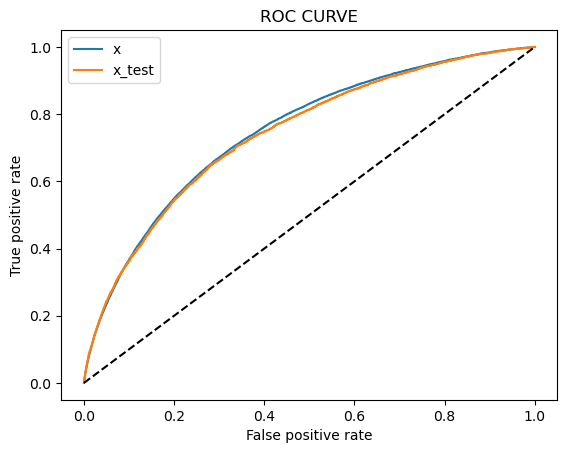

<function __main__.lr_model(x, y, x_test, y_test, C=0.1)>

In [180]:
lr_model(x_train_woe_stp,y_train,x_test_woe_stp,y_test,C=0.1)
lr_model

In [181]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
param_grid = {'C':[0.01,0.1,1,10],'penalty':['l1','l2'],'solver':['liblinear']}
model = LogisticRegression(C=0.1,class_weight='balanced')
grd = GridSearchCV(estimator=model,param_grid=param_grid,scoring='roc_auc',cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=22),n_jobs=-1,refit=True,verbose=1)
grd.fit(x_train_woe_stp,y_train)
print('最优参数:',grd.best_params_)
print('最优AUC:',grd.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
最优参数: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
最优AUC: 0.7483893774570707


In [ ]:
# print('top 10 features with high iv')
# display(toad.quality(application_train.drop('SK_ID_CURR',axis=1),'TARGET',iv_only=True)[:10])
# print('last 10 features with low iv')
# display(toad.quality(application_train.drop('SK_ID_CURR',axis=1),'TARGET',iv_only=True)[-10:])